In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Show the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Shape of the data before dropping duplicates
print(f"Shape before dropping duplicates: {data.shape}")

Number of duplicate rows: 1081
Shape before dropping duplicates: (284807, 31)


In [7]:
# Drop duplicate rows if any
data = data.drop_duplicates()

# Confirm that duplicates are removed
print(f"Number of duplicate rows after cleaning: {data.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


In [9]:
# Display the shape of the dataset after cleaning
print(f"Shape after cleaning: {data.shape}")

Shape after cleaning: (283726, 31)


In [10]:
# Correlation matrix to see relationships between features and the target
corr_matrix = data.corr()

# Sort correlation with respect to target (Class) to identify important features
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print("Correlation of features with target 'Class':")
print(corr_with_target)

Correlation of features with target 'Class':
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


In [15]:
# Select features that have a high correlation with the target (Class)
X = data[['V11','V4','V2','V19','V8','V21','V27','V20']]
y = data['Class']

In [16]:
# Display selected features and target
print("Features:")
X.head()

Features:


,V11,V4,V2,V19,V8,V21,V27,V20
0,-0.551600,1.378155,-0.072781,0.403993,0.098698,-0.018307,0.133558,0.251412
1,1.612727,0.448154,0.266151,-0.145783,0.085102,-0.225775,-0.008983,-0.069083
2,0.624501,0.379780,-1.340163,-2.261857,0.247676,0.247998,-0.055353,0.524980
3,-0.226487,-0.863291,-0.185226,-1.232622,0.377436,-0.108300,0.062723,-0.208038
4,-0.822843,0.403034,0.877737,0.803487,-0.270533,-0.009431,0.219422,0.408542


In [17]:
print("Target:")
y.head()

Target:


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [21]:
# Model 2: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [22]:
# Model 3: Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)  # Scale required for SVC
svc_pred = svc.predict(X_test_scaled)

In [23]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, classification_report

rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"SVC Accuracy: {svc_accuracy}\n")

Random Forest Accuracy: 0.9992422373383146
Decision Tree Accuracy: 0.998766432876326
SVC Accuracy: 0.9992069925633524



In [24]:
# Classification reports for each model
rf_report = classification_report(y_test, rf_pred)
dt_report = classification_report(y_test, dt_pred)
svc_report = classification_report(y_test, svc_pred)

print(f"Random Forest Classification Report:\n{rf_report}")
print(f"Decision Tree Classification Report:\n{dt_report}")
print(f"SVC Classification Report:\n{svc_report}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.53      0.69        90

    accuracy                           1.00     56746
   macro avg       0.99      0.77      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.64      0.52      0.57        90

    accuracy                           1.00     56746
   macro avg       0.82      0.76      0.79     56746
weighted avg       1.00      1.00      1.00     56746

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.51      0.67        90

    accuracy                           1.00     56746
   macro avg       0.99    

In [25]:
# Visualization: Feature Importance in Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

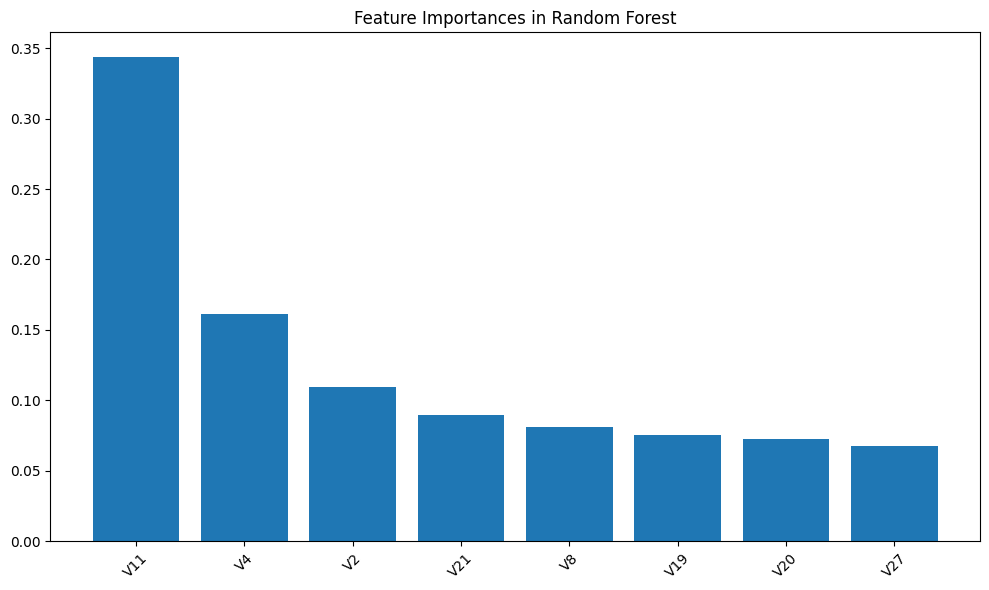

In [26]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

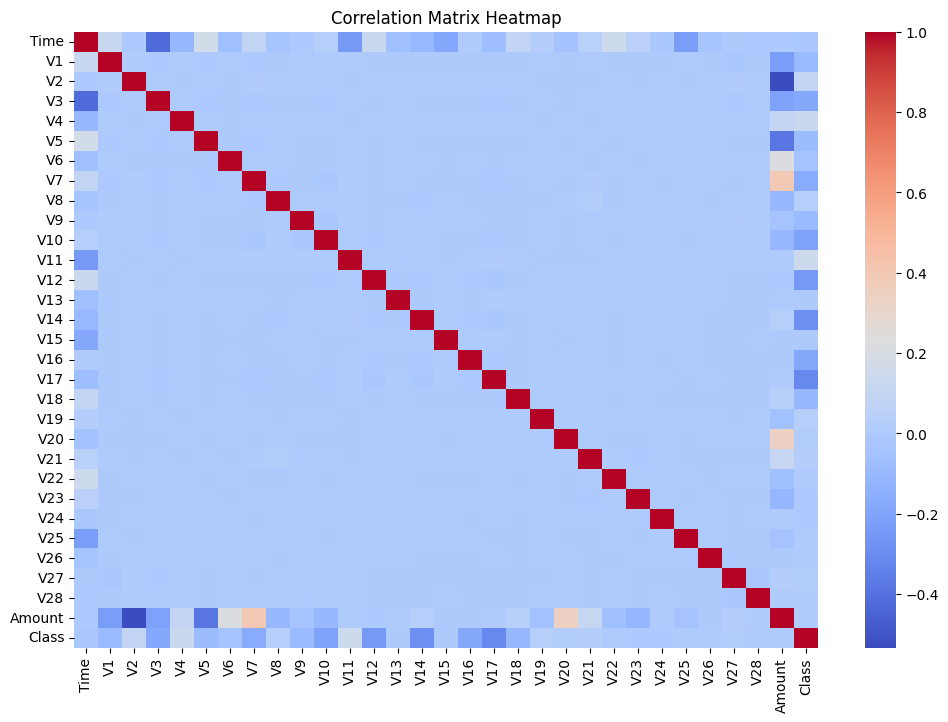

In [27]:
# Visualization: Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

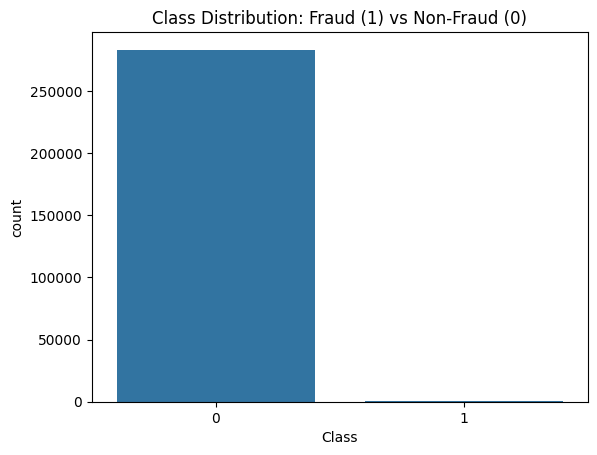

In [28]:
# Visualization: Fraud vs Non-Fraud Transactions
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Fraud (1) vs Non-Fraud (0)')
plt.show()

In [29]:
# File I/O: Saving model performance results to CSV and Text files

# Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Predictions': rf_pred,
    'Decision Tree Predictions': dt_pred,
    'SVC Predictions': svc_pred
})
predictions_df.to_csv('credit_card_fraud_predictions.csv', index=False)

In [30]:
# Save classification reports to a text file
with open('model_evaluation_report.txt', 'w') as f:
    f.write("Random Forest Classification Report:\n")
    f.write(rf_report + "\n\n")
    f.write("Decision Tree Classification Report:\n")
    f.write(dt_report + "\n\n")
    f.write("SVC Classification Report:\n")
    f.write(svc_report + "\n\n")